In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda, u_arrays as ua
import datetime
import matplotlib.colors as mcolors
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from utils import u_plot as uplot
import salem
import numpy.ma as ma
from scipy import stats
import warnings
from scipy.ndimage.measurements import label
import shapely.geometry as shpg
import datetime

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
fpath = cnst.network_data + 'figs/HUARAZ/'

In [44]:
corr_all = xr.open_dataset('/home/ck/DIR/mymachine/GRIDSAT/MCS18_peru/correlations/GRIDSAT-40_u_correlation_SouthAmerica_1985-2018_diffs_DJF.nc')
corr_end = xr.open_dataset('/home/ck/DIR/mymachine/GRIDSAT/MCS18_peru/correlations/GRIDSAT-40_u_correlation_SouthAmerica_2001-2018_diffs_DJF.nc')

In [45]:
corr_all = corr_all.where(corr_all['pval']<=0.05)
corr_end = corr_end.where(corr_end['pval']<=0.05)

In [46]:
topo = xr.open_dataarray(cnst.TOPO_1MIN).sel(lon=slice(-81,-65), lat=slice(-25,0))
topo_on_g = corr_all.salem.lookup_transform(topo)

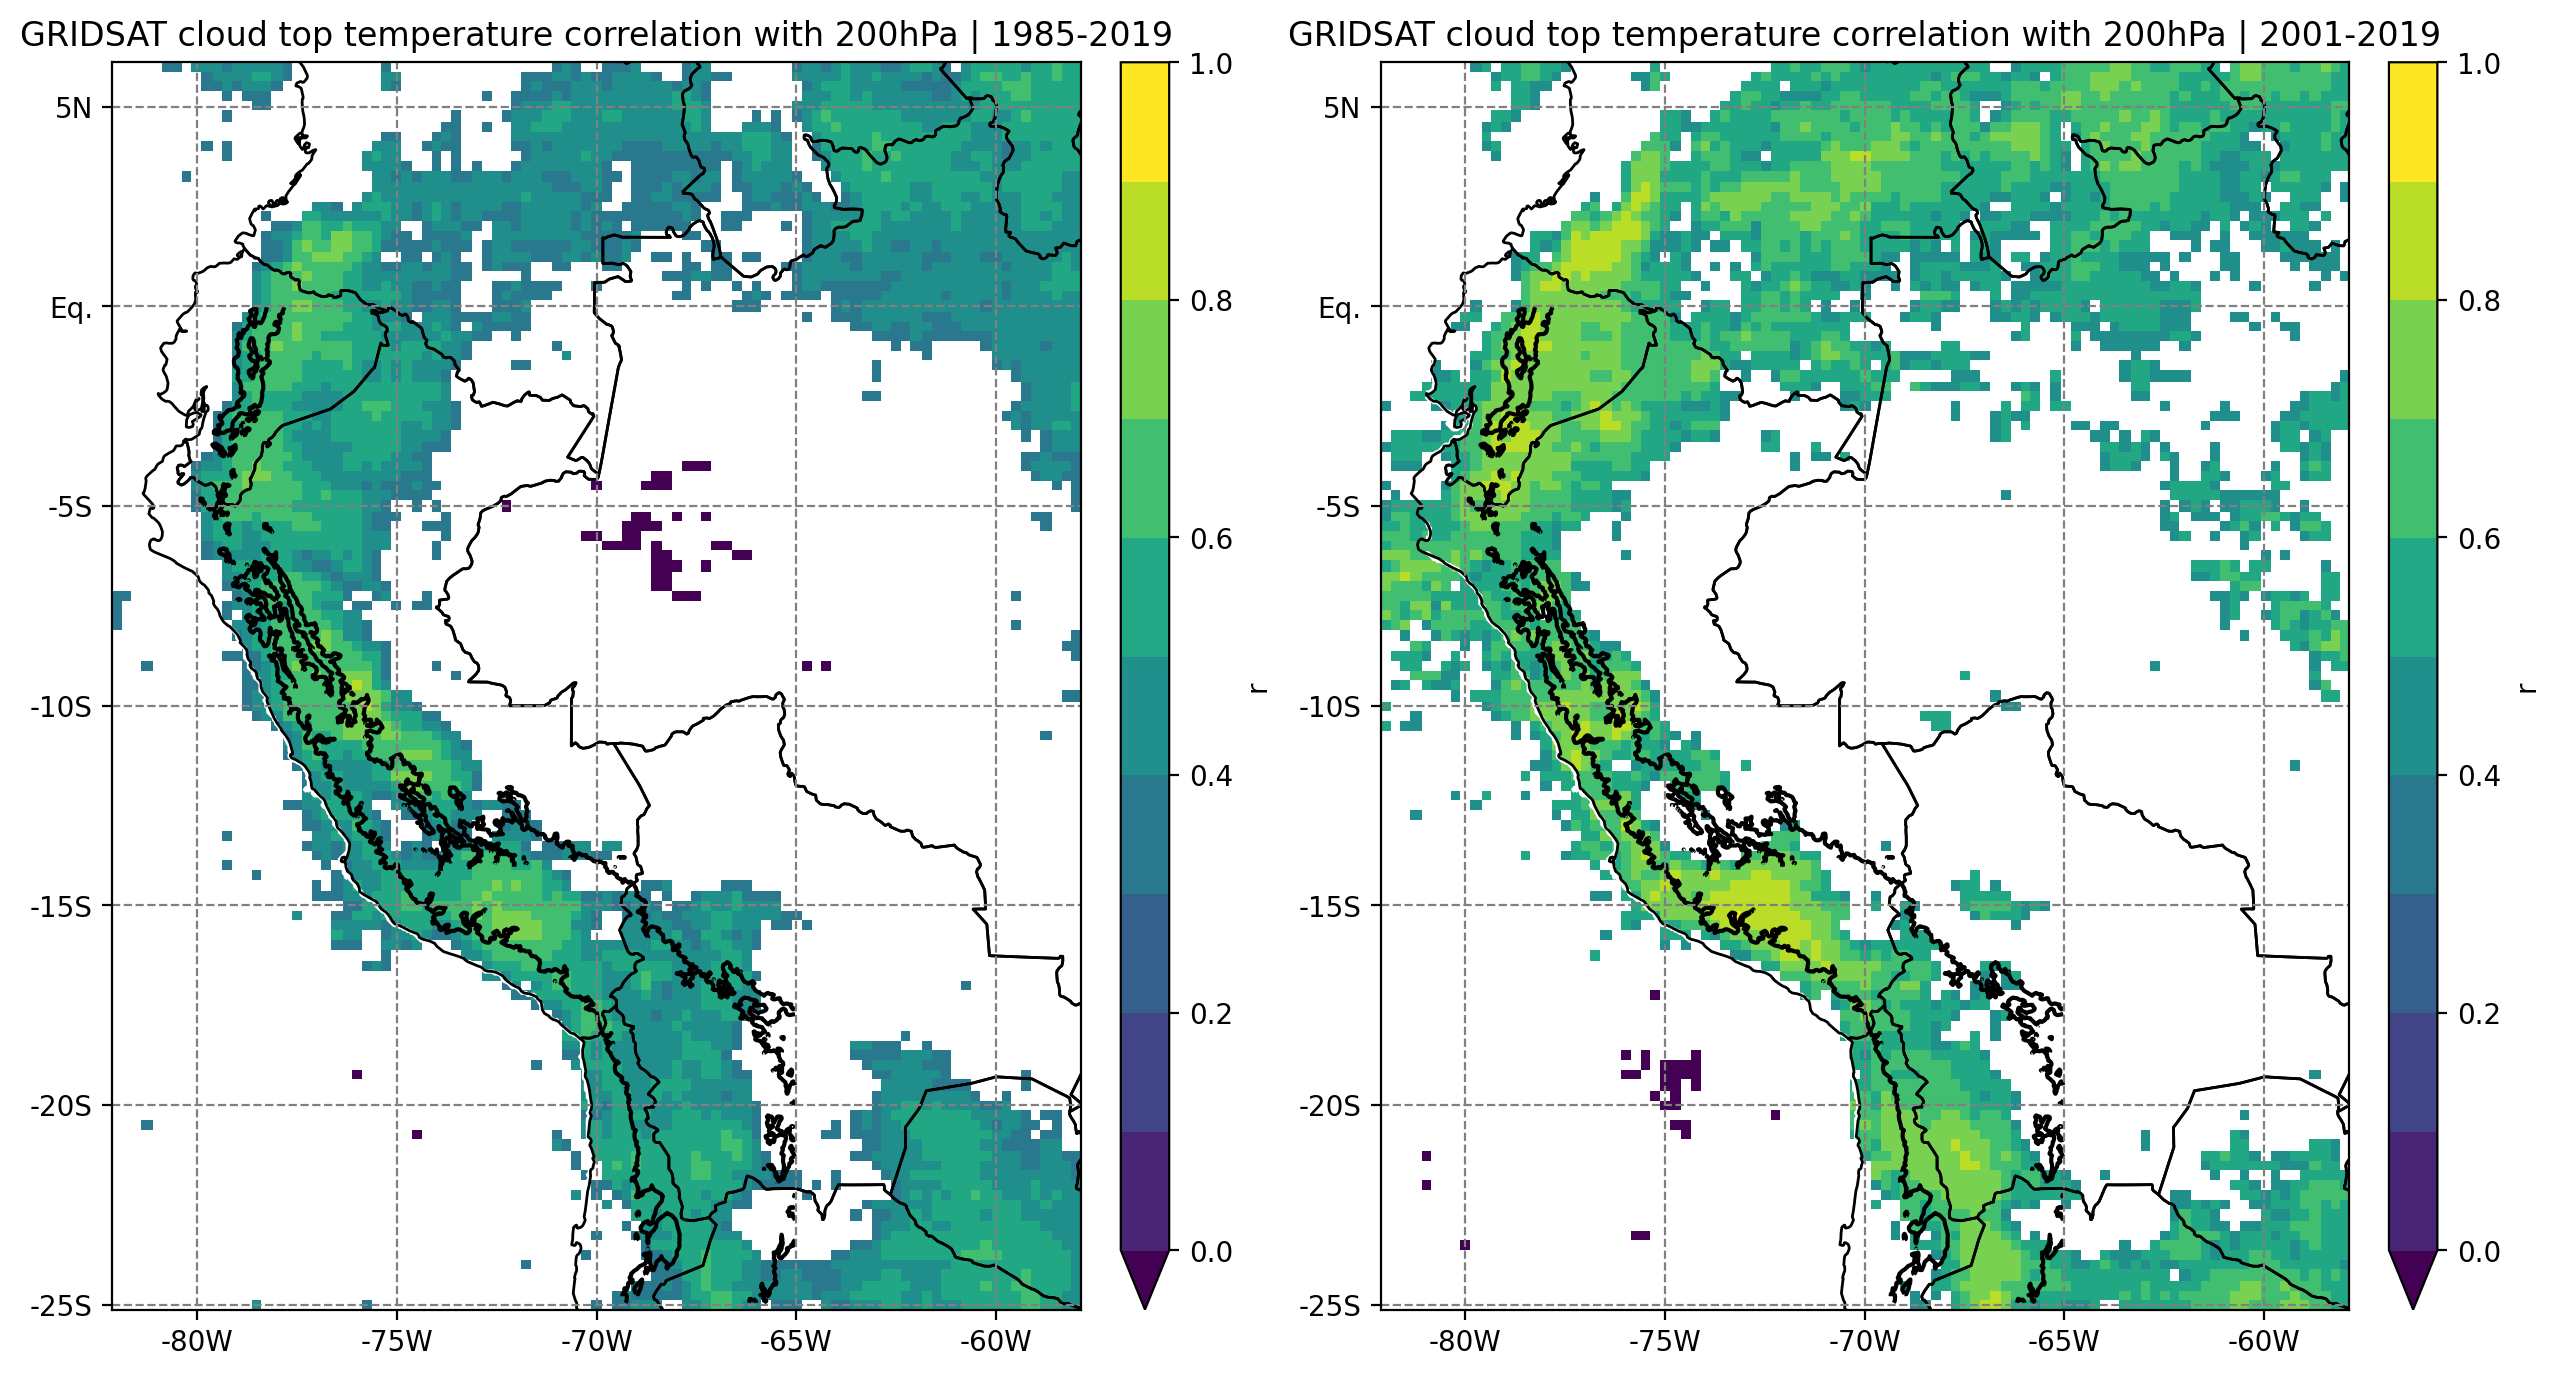

In [47]:
lakes = salem.read_shapefile(salem.get_demo_file('ne_50m_lakes.shp'),
                              cached=True)

map = corr_all.salem.get_map()
f = plt.figure(figsize=(15,10), dpi=200)


ax = f.add_subplot(121)
map.set_data(corr_all['r'])
map.set_plot_params(levels=np.arange(0,1.1,0.1), cmap='viridis') #np.arange(90,270,6)
map.set_contour(topo, interp='linear', levels=[0, 3000], cmap='Greys')
map.visualize(cbar_title='r', title='GRIDSAT cloud top temperature correlation with 200hPa | 1985-2019')
plt.plot(-77.5, -9.5, 'ro', markersize=5)

# ax = f.add_subplot(234)
# #corr_first_num[np.where(np.isnan((365-outarr_3)+endarr_5))] = np.nan
# map.set_data(corr_first_num)
# map.set_plot_params(levels=np.arange(30,150,6), cmap='viridis', extend='both') #[182,213,244,274,305,335, 366]  # 182-July, 335- December
# map.set_contour(topo, interp='linear', levels=[0, 3000], cmap='Greys')
# map.set_shapefile(lakes, edgecolor='k', facecolor='k', linewidth=2)
# plt.plot(-77.5, -9.5, 'ro', markersize=5)
# map.visualize(cbar_title='Nb of days', title='Number of correlation days per year [July-May]')

ax = f.add_subplot(122)

map.set_data(corr_end['r'])
map.set_plot_params(levels=np.arange(0,1.1,0.1), cmap='viridis') #np.arange(90,270,6)
map.set_contour(topo, interp='linear', levels=[0, 3000], cmap='Greys')
map.visualize(cbar_title='r', title='GRIDSAT cloud top temperature correlation with 200hPa | 2001-2019')
plt.plot(-77.5, -9.5, 'ro', markersize=5)
f.savefig('/home/ck/DIR/cornkle/figs/HUARAZ/correlations/GRIDSAT_200hPa_corr.jpg')


In [48]:
corr_all = xr.open_dataset('/home/ck/DIR/mymachine/CHIRPS/peru/CHIRPS_u200_correlation_peru_1985-2018_diffs_DJF.nc')
corr_end = xr.open_dataset('/home/ck/DIR/mymachine/CHIRPS/peru/CHIRPS_u200_correlation_peru_2001-2018_diffs_DJF.nc')

In [49]:
corr_all = corr_all.where(corr_all['pval']<=0.05)
corr_end = corr_end.where(corr_end['pval']<=0.05)

In [50]:
topo = xr.open_dataarray(cnst.TOPO_1MIN).sel(lon=slice(-81,-65), lat=slice(-25,0))
topo_on_g = corr_all.salem.lookup_transform(topo)

In [62]:
def covariance(x,y,dims=None):

    return xr.dot(x-x.mean(dims), y-y.mean(dims), dims=dims) #/ x.count(dims)

In [64]:
covariance(corr_all['pval'], corr_end['pval'], dims=['latitude', 'longitude'])

<xarray.DataArray 'pval' ()>
array(nan)
Coordinates:
    level    int32 250

In [66]:
xr.dot(corr_all['pval']-corr_all['pval'].mean(),  corr_all['pval']-corr_all['pval'].mean())

<xarray.DataArray 'pval' ()>
array(nan)
Coordinates:
    level    int32 250

In [59]:
xr.cov(corr_all['pval'], corr_end['pval'])

<xarray.DataArray 'pval' ()>
array(2.32983336e-05)
Coordinates:
    level    int32 250

In [60]:
corr_all['pval']

<xarray.DataArray 'pval' (latitude: 69, longitude: 53)>
array([[       nan,        nan,        nan, ..., 0.01367708,        nan,
               nan],
       [       nan,        nan,        nan, ..., 0.03554882,        nan,
               nan],
       [       nan,        nan,        nan, ..., 0.0491819 ,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * longitude  (longitude) float32 -81.0 -80.75 -80.5 ... -68.5 -68.25 -68.0
  * latitude   (latitude) float32 -17.0 -16.75 -16.5 -16.25 ... -0.5 -0.25 0.0
    level      int32 250

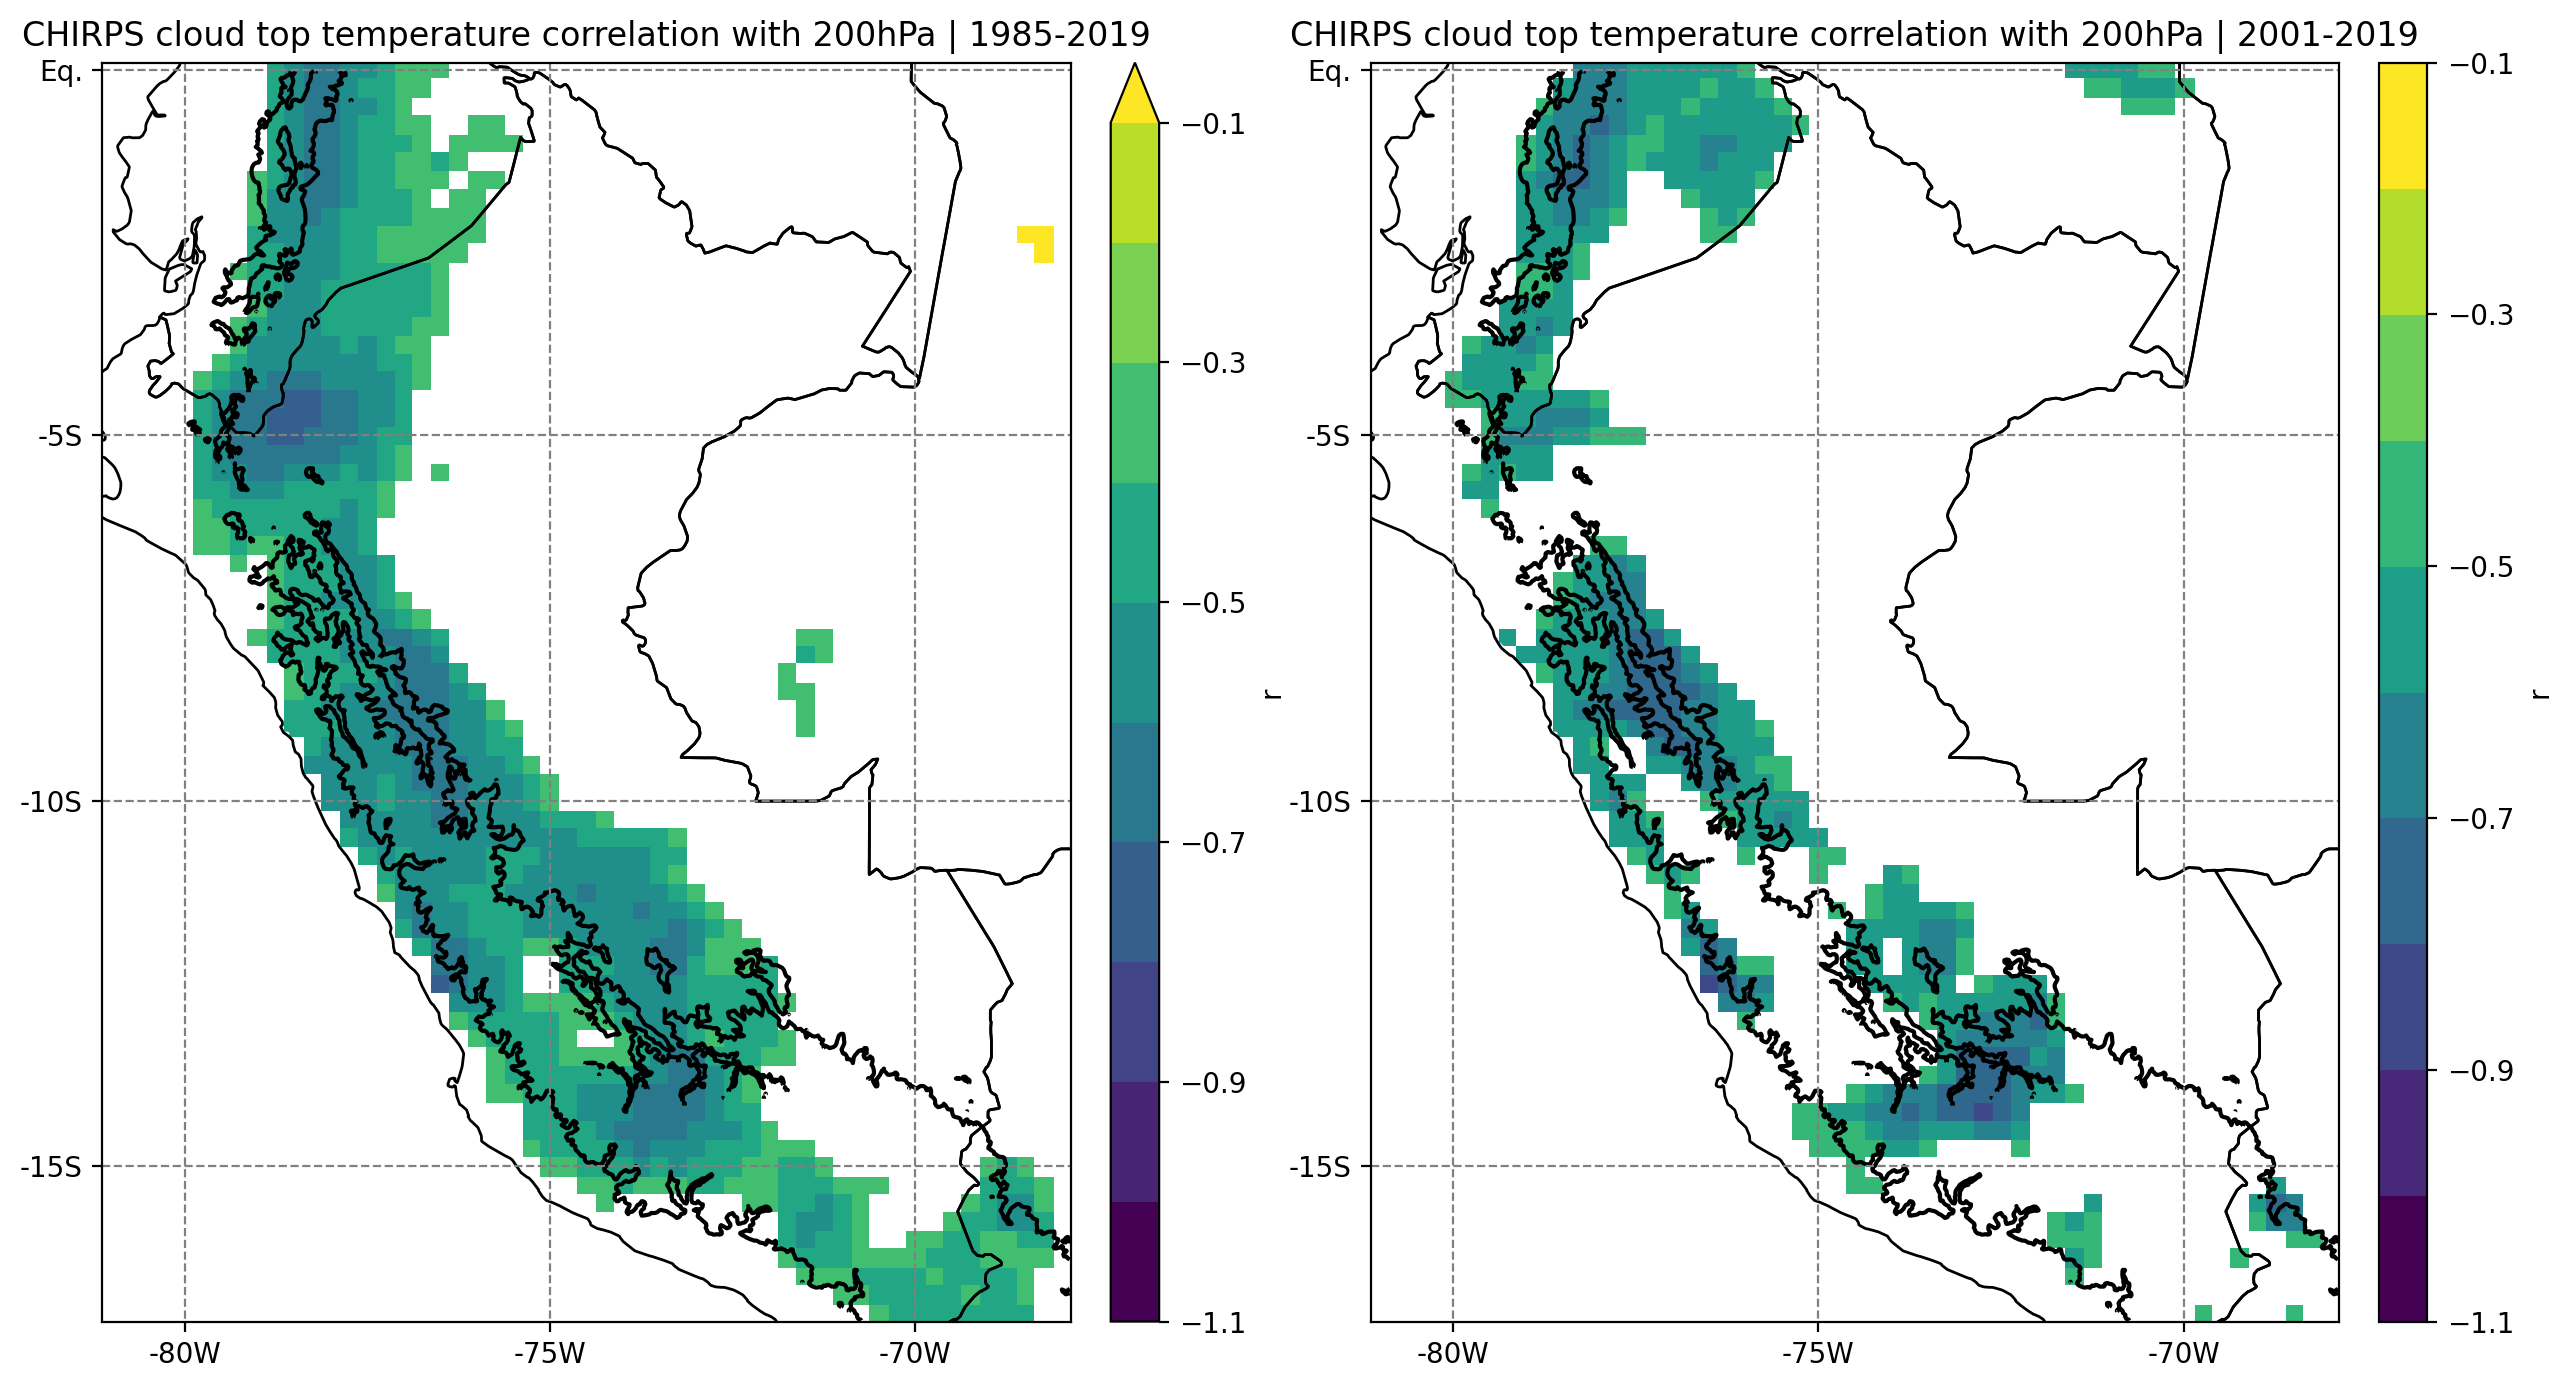

In [51]:
lakes = salem.read_shapefile(salem.get_demo_file('ne_50m_lakes.shp'),
                              cached=True)

map = corr_all.salem.get_map()
f = plt.figure(figsize=(15,10), dpi=200)


ax = f.add_subplot(121)
map.set_data(corr_all['r'])
map.set_plot_params(levels=np.arange(-1.1,0,0.1), cmap='viridis') #np.arange(90,270,6)
map.set_contour(topo, interp='linear', levels=[0, 3000], cmap='Greys')
map.visualize(cbar_title='r', title='CHIRPS cloud top temperature correlation with 200hPa | 1985-2019')
plt.plot(-77.5, -9.5, 'ro', markersize=5)

# ax = f.add_subplot(234)
# #corr_first_num[np.where(np.isnan((365-outarr_3)+endarr_5))] = np.nan
# map.set_data(corr_first_num)
# map.set_plot_params(levels=np.arange(30,150,6), cmap='viridis', extend='both') #[182,213,244,274,305,335, 366]  # 182-July, 335- December
# map.set_contour(topo, interp='linear', levels=[0, 3000], cmap='Greys')
# map.set_shapefile(lakes, edgecolor='k', facecolor='k', linewidth=2)
# plt.plot(-77.5, -9.5, 'ro', markersize=5)
# map.visualize(cbar_title='Nb of days', title='Number of correlation days per year [July-May]')

ax = f.add_subplot(122)

map.set_data(corr_end['r'])
map.set_plot_params(levels=np.arange(-1.1,0,0.1), cmap='viridis') #np.arange(90,270,6)
map.set_contour(topo, interp='linear', levels=[0, 3000], cmap='Greys')
map.visualize(cbar_title='r', title='CHIRPS cloud top temperature correlation with 200hPa | 2001-2019')
plt.plot(-77.5, -9.5, 'ro', markersize=5)
f.savefig('/home/ck/DIR/cornkle/figs/HUARAZ/correlations/CHIRPS_200hPa_corr.jpg')


In [22]:
corr_all = xr.open_dataset('/home/ck/DIR/mymachine/CHIRPS/peru/CHIRPS_NDVI_correlation_peru_1985-2018_diffs_DJF.nc')
corr_end = xr.open_dataset('/home/ck/DIR/mymachine/CHIRPS/peru/CHIRPS_NDVI_correlation_peru_2001-2018_diffs_DJF.nc')
corr_all = corr_all.where(corr_all['pval']<=0.05)
corr_end = corr_end.where(corr_end['pval']<=0.05)
topo = xr.open_dataarray(cnst.TOPO_1MIN).sel(lon=slice(-81,-65), lat=slice(-25,0))
topo_on_g = corr_all.salem.lookup_transform(topo)

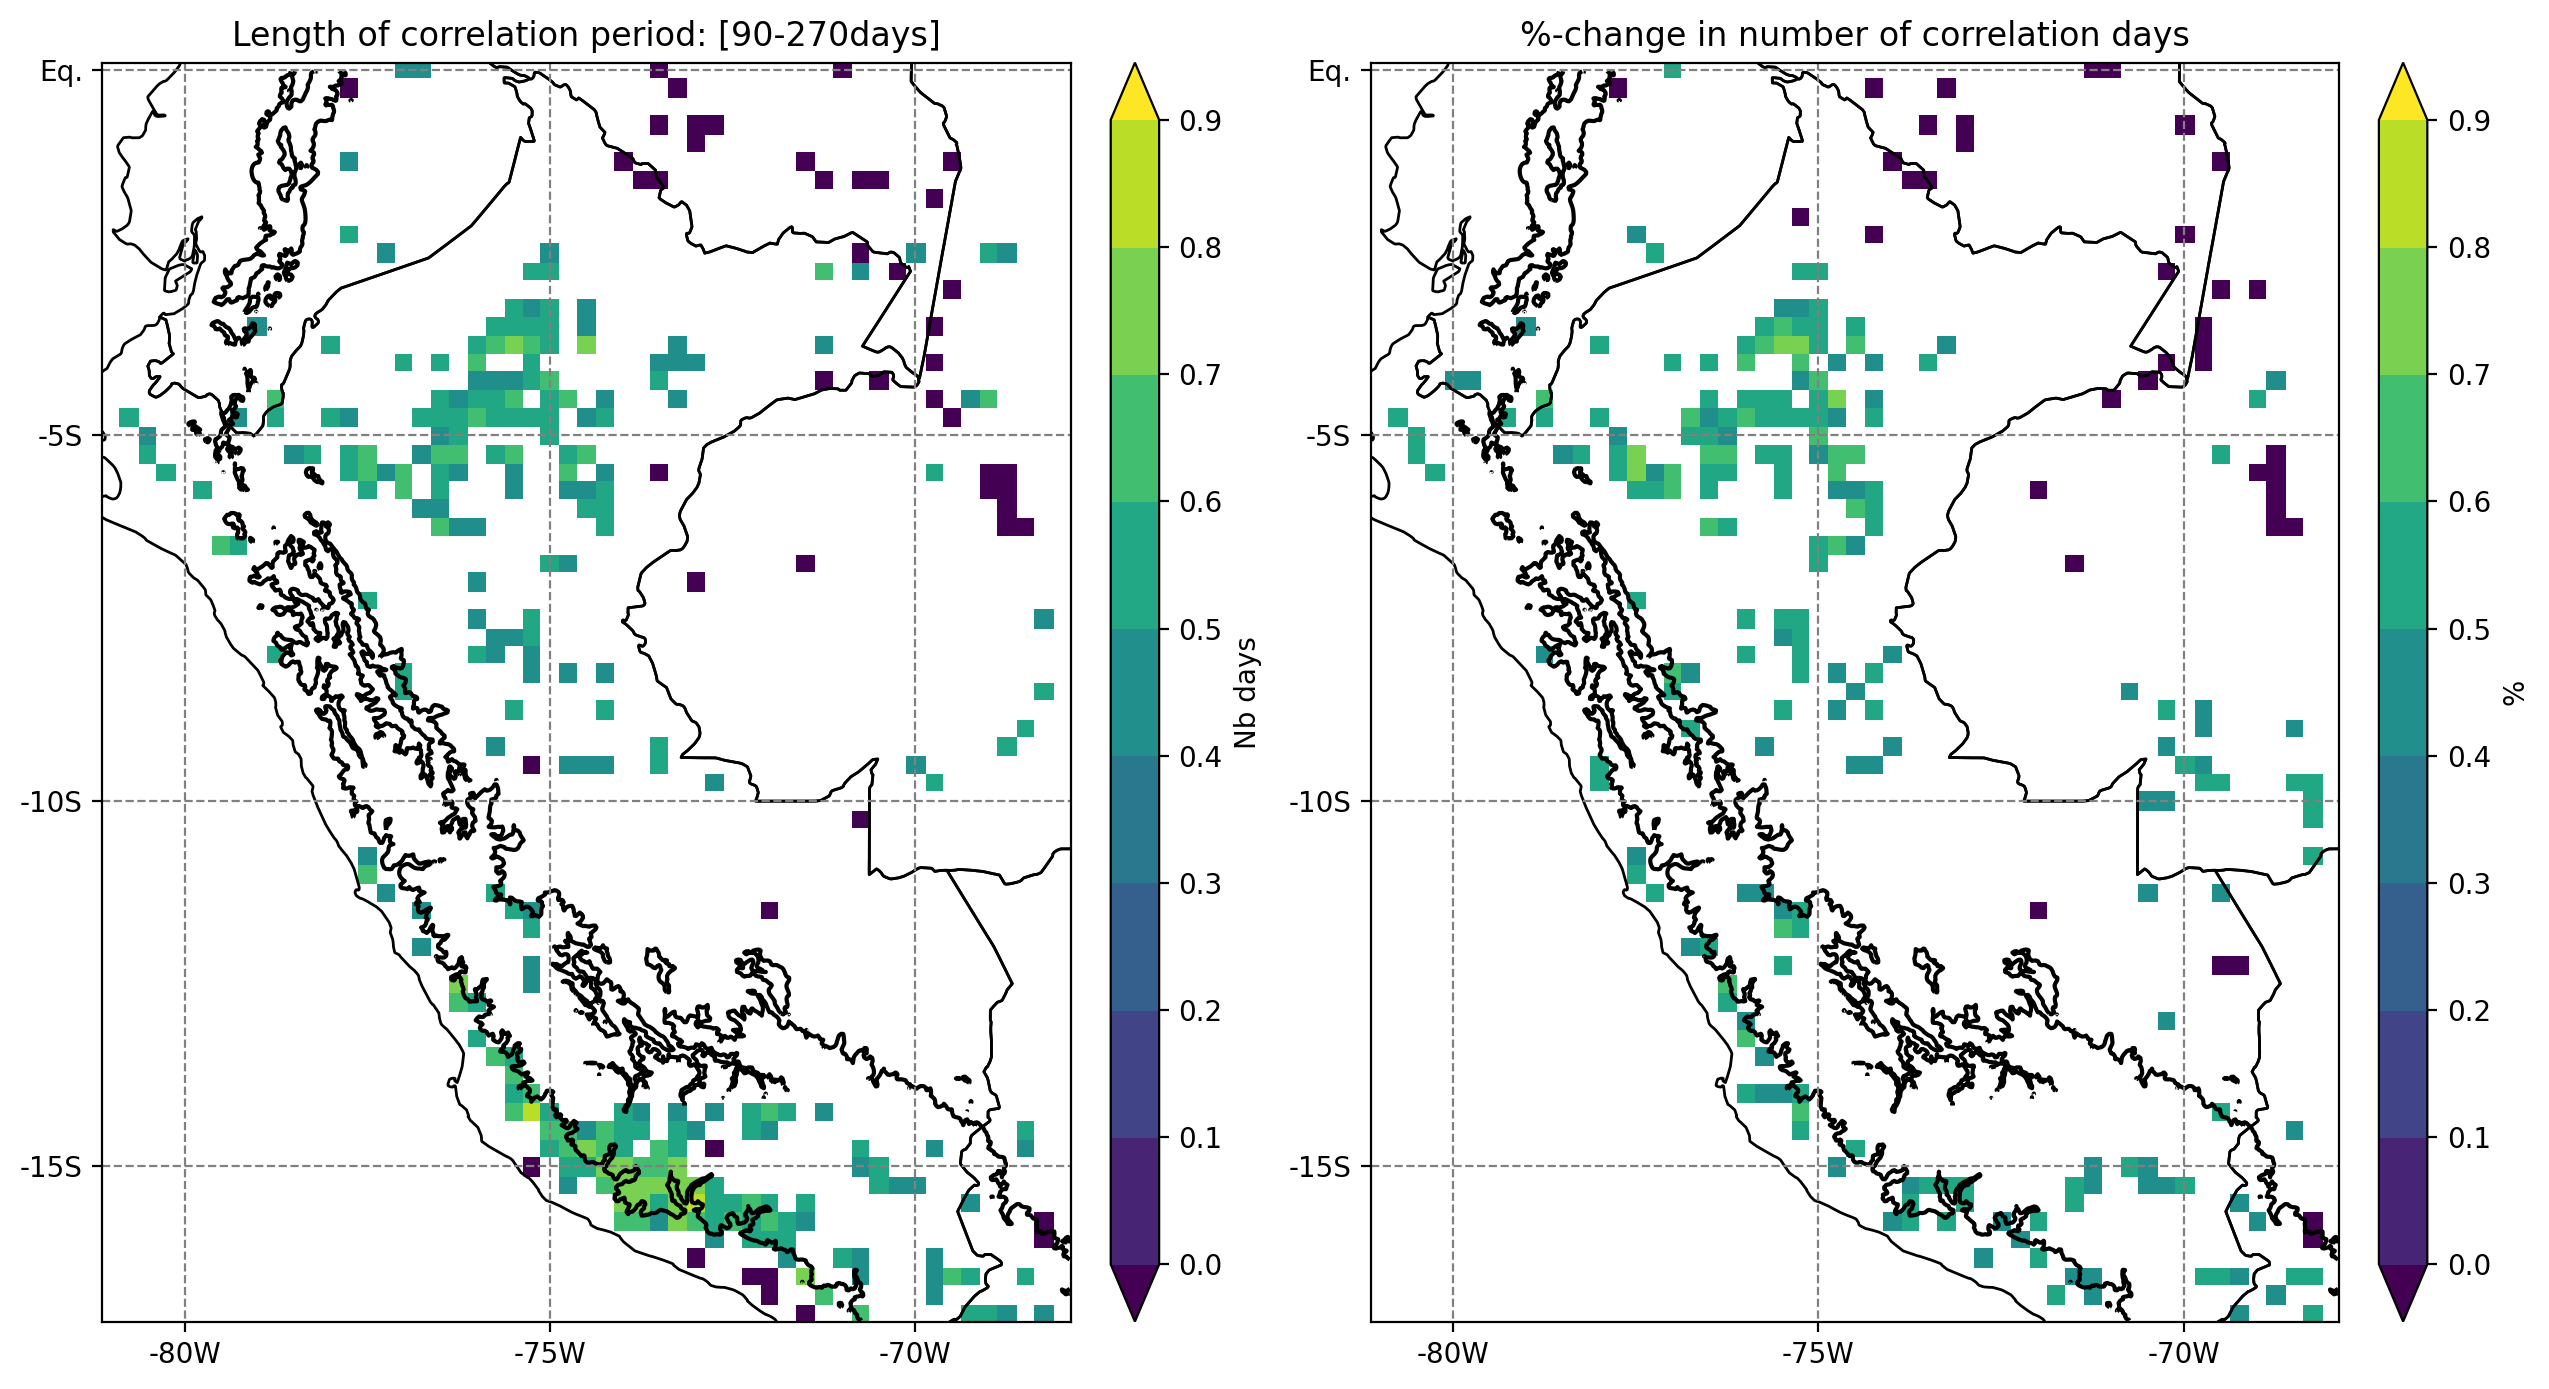

In [24]:
lakes = salem.read_shapefile(salem.get_demo_file('ne_50m_lakes.shp'),
                              cached=True)

map = corr_all.salem.get_map()
f = plt.figure(figsize=(15,10), dpi=200)


ax = f.add_subplot(121)
map.set_data(corr_all['r'])
map.set_plot_params(levels=np.arange(0,1,0.1), cmap='viridis', extend='both') #np.arange(90,270,6)
map.set_contour(topo, interp='linear', levels=[0, 3000], cmap='Greys')
map.visualize(cbar_title='Nb days', title='Length of correlation period: [90-270days]')
plt.plot(-77.5, -9.5, 'ro', markersize=5)

# ax = f.add_subplot(234)
# #corr_first_num[np.where(np.isnan((365-outarr_3)+endarr_5))] = np.nan
# map.set_data(corr_first_num)
# map.set_plot_params(levels=np.arange(30,150,6), cmap='viridis', extend='both') #[182,213,244,274,305,335, 366]  # 182-July, 335- December
# map.set_contour(topo, interp='linear', levels=[0, 3000], cmap='Greys')
# map.set_shapefile(lakes, edgecolor='k', facecolor='k', linewidth=2)
# plt.plot(-77.5, -9.5, 'ro', markersize=5)
# map.visualize(cbar_title='Nb of days', title='Number of correlation days per year [July-May]')

ax = f.add_subplot(122)

map.set_data(corr_end['r'])
map.set_plot_params(levels=np.arange(0,1,0.1), cmap='viridis', extend='both') #np.arange(90,270,6)
map.set_contour(topo, interp='linear', levels=[0, 3000], cmap='Greys')
map.visualize(cbar_title='%', title='%-change in number of correlation days')
plt.plot(-77.5, -9.5, 'ro', markersize=5)



In [27]:
corr_all = xr.open_dataset('/home/ck/DIR/mymachine/GRIDSAT/MCS18_peru/correlations/GRIDSAT-40_NDVI_correlation_SouthAmerica_1985-2018_diffs_DJF.nc')
corr_end = xr.open_dataset('/home/ck/DIR/mymachine/GRIDSAT/MCS18_peru/correlations/GRIDSAT-40_NDVI_correlation_SouthAmerica_2001-2018_diffs_DJF.nc')
corr_all = corr_all.where(corr_all['pval']<=0.05)
corr_end = corr_end.where(corr_end['pval']<=0.05)
topo = xr.open_dataarray(cnst.TOPO_1MIN).sel(lon=slice(-81,-65), lat=slice(-25,0))
topo_on_g = corr_all.salem.lookup_transform(topo)

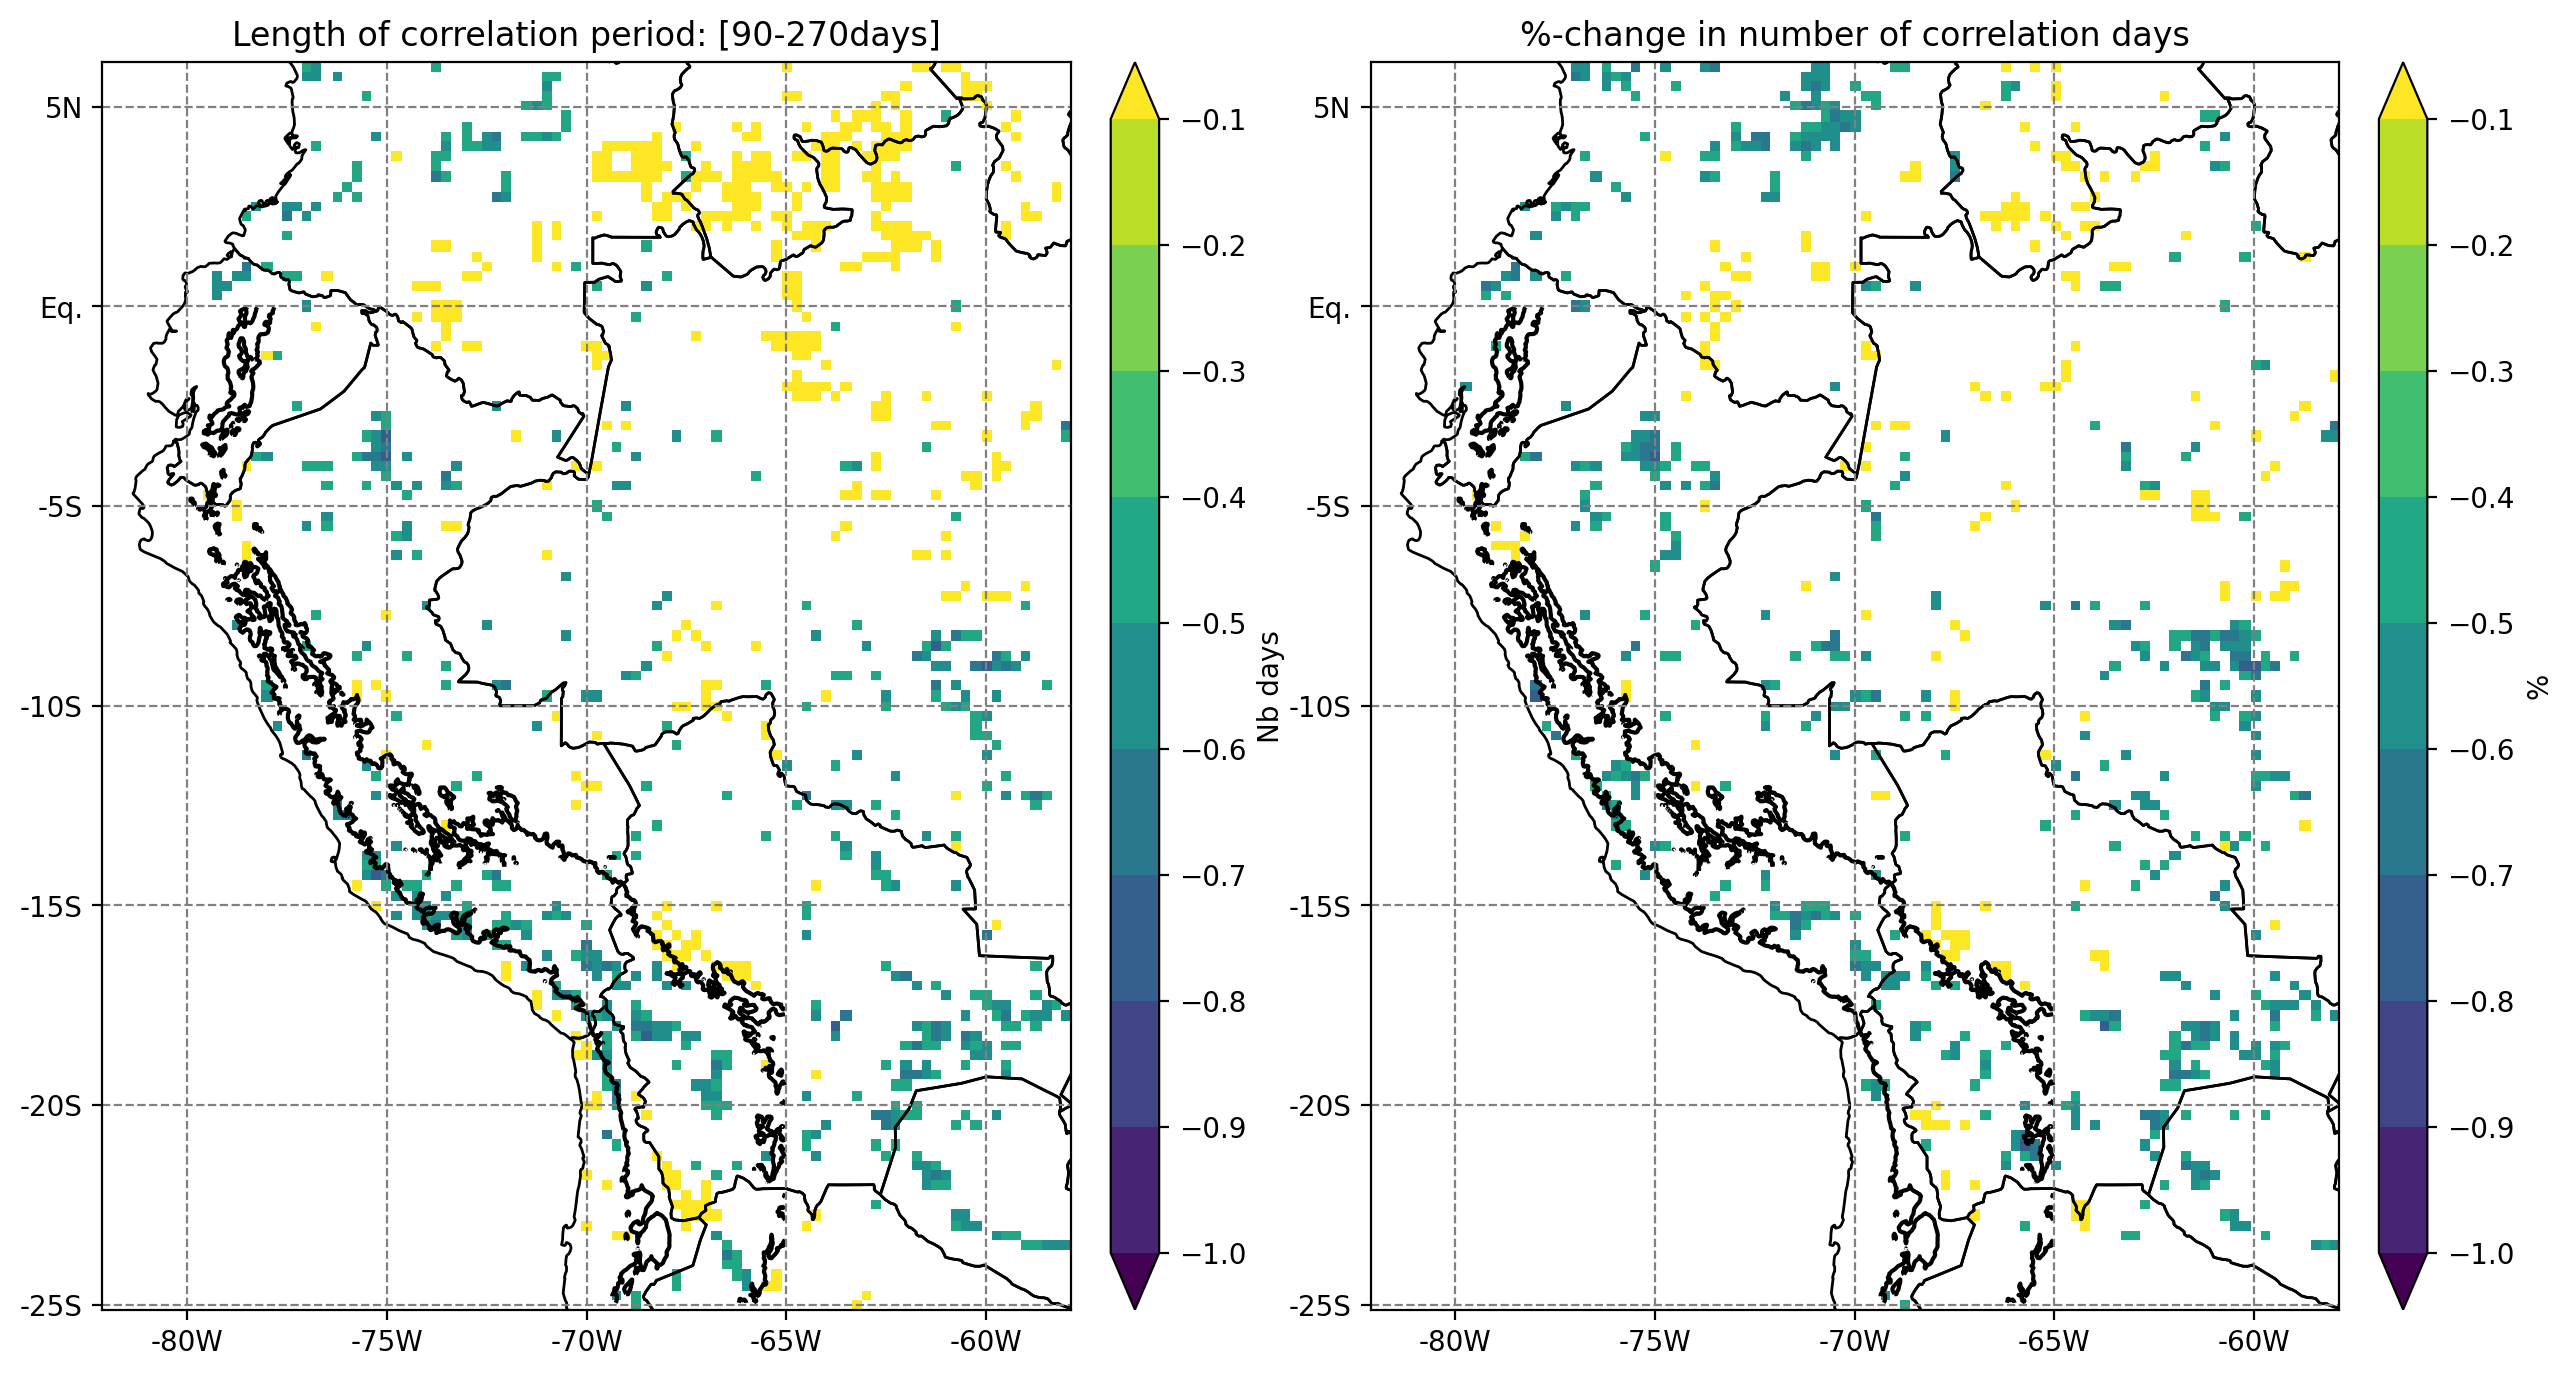

In [29]:
lakes = salem.read_shapefile(salem.get_demo_file('ne_50m_lakes.shp'),
                              cached=True)

map = corr_all.salem.get_map()
f = plt.figure(figsize=(15,10), dpi=200)


ax = f.add_subplot(121)
map.set_data(corr_all['r'])
map.set_plot_params(levels=np.arange(-1,0,0.1), cmap='viridis', extend='both') #np.arange(90,270,6)
map.set_contour(topo, interp='linear', levels=[0, 3000], cmap='Greys')
map.visualize(cbar_title='Nb days', title='Length of correlation period: [90-270days]')
plt.plot(-77.5, -9.5, 'ro', markersize=5)

# ax = f.add_subplot(234)
# #corr_first_num[np.where(np.isnan((365-outarr_3)+endarr_5))] = np.nan
# map.set_data(corr_first_num)
# map.set_plot_params(levels=np.arange(30,150,6), cmap='viridis', extend='both') #[182,213,244,274,305,335, 366]  # 182-July, 335- December
# map.set_contour(topo, interp='linear', levels=[0, 3000], cmap='Greys')
# map.set_shapefile(lakes, edgecolor='k', facecolor='k', linewidth=2)
# plt.plot(-77.5, -9.5, 'ro', markersize=5)
# map.visualize(cbar_title='Nb of days', title='Number of correlation days per year [July-May]')

ax = f.add_subplot(122)

map.set_data(corr_end['r'])
map.set_plot_params(levels=np.arange(-1,0,0.1), cmap='viridis', extend='both') #np.arange(90,270,6)
map.set_contour(topo, interp='linear', levels=[0, 3000], cmap='Greys')
map.visualize(cbar_title='%', title='%-change in number of correlation days')
plt.plot(-77.5, -9.5, 'ro', markersize=5)
